# Support Vector Machine (SVM) Classification Analysis
## Dataset:: HIGGS UCI
*Name:* Diganta Mandal  
*Roll Number:* 22CS30062

---

## Introduction

This notebook provides an in-depth exploration of Support Vector Machine (SVM) classification. SVM is a powerful supervised learning algorithm that excels in binary classification tasks, though it can be extended to multi-class problems as well. In this notebook, we will cover the following:

- Preprocessing the dataset for SVM
- Training the SVM classifier with various kernels
- Tuning hyperparameters to optimize model performance
- Evaluating the classifier using metrics such as accuracy, precision, recall, and F1-score

Through this analysis, we aim to understand the impact of different kernels and hyperparameters on classification performance and gain insights into model optimization.


# Loading the Dataset

<b> Importing the required libraries</b>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.svm import LinearSVC,SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics.pairwise import rbf_kernel, linear_kernel
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score,roc_auc_score

<b>Random sample 0.01% of the original dataset and save it as `HIGGS_sample.csv` before running</b><br>Link to `HIGGS_sample.csv`:
https://drive.google.com/file/d/1-9OdEjnxkdi-Ghtfhox0BNsIfnPk2nIR/view?usp=sharing

In [ ]:
df=pd.read_csv('HIGGS_sample.csv',header=None)

# Data Preprocessing

In [3]:
df=df.drop(columns=[0])#Contains serial number so just drop it

In [4]:
df.drop(index=0,inplace=True)

In [5]:
df

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
1,1.0,0.532373,-0.563982,-0.707137,0.682998,0.702177,2.064735,-1.227911,0.030652,0.000000,...,-0.234484,-1.359247,0.000000,0.671950,2.374774,0.981455,0.856261,0.995606,1.971345,1.486434
2,0.0,0.341129,0.069098,0.325565,2.925696,0.500175,1.929798,-0.790229,-1.300509,2.173076,...,0.135289,1.291674,3.101961,2.793955,1.845023,0.971333,3.271633,1.187914,1.998760,2.342642
3,1.0,1.768051,-0.226015,-1.334685,1.382299,0.217815,0.470495,-0.552574,0.669846,0.000000,...,1.217127,1.470911,0.000000,0.977827,0.756365,2.134194,1.172502,0.651040,0.825880,0.750081
4,0.0,0.716481,-0.800656,-1.245352,0.648034,0.972671,0.600302,0.714921,1.638340,0.000000,...,-0.047932,0.899351,3.101961,1.488407,0.917862,0.983844,0.791456,0.491298,0.732747,0.750671
5,0.0,0.327586,1.395643,1.130114,1.191988,0.713228,0.883368,0.884250,-1.577697,2.173076,...,-0.337754,-0.480818,3.101961,0.852777,1.272682,0.992933,0.824094,1.227924,0.882994,0.805299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109996,0.0,0.907542,-0.118878,1.366485,0.260540,0.048073,0.742202,-1.697279,-1.429678,0.000000,...,-0.969867,1.018102,3.101961,0.765137,1.872087,0.979766,0.675238,0.317767,1.528717,1.292387
109997,0.0,0.308187,1.119036,1.468025,0.710743,-0.211120,1.154709,-0.059439,-0.745579,2.173076,...,-0.177852,0.355537,1.550981,0.898439,0.894660,0.980654,0.800370,1.152510,1.032941,0.846468
109998,1.0,1.043152,0.796652,0.929809,0.943905,-1.743694,1.223872,0.170294,0.959785,0.000000,...,-0.579273,-0.143431,3.101961,0.652886,0.908635,0.988248,0.914851,0.888889,0.880882,0.793986
109999,0.0,1.514400,-0.998372,0.248440,0.241153,0.816586,1.071255,-0.621890,-1.129761,0.000000,...,0.278535,-0.835964,3.101961,3.103389,1.948786,0.993748,0.983226,0.763662,1.399636,1.181223


In [6]:
df.shape

(110000, 29)

In [7]:
df.columns=['label']+[f'feature_{i}' for i in range(1,29)] #Give readable name to each columns

In [8]:
df

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28
1,1.0,0.532373,-0.563982,-0.707137,0.682998,0.702177,2.064735,-1.227911,0.030652,0.000000,...,-0.234484,-1.359247,0.000000,0.671950,2.374774,0.981455,0.856261,0.995606,1.971345,1.486434
2,0.0,0.341129,0.069098,0.325565,2.925696,0.500175,1.929798,-0.790229,-1.300509,2.173076,...,0.135289,1.291674,3.101961,2.793955,1.845023,0.971333,3.271633,1.187914,1.998760,2.342642
3,1.0,1.768051,-0.226015,-1.334685,1.382299,0.217815,0.470495,-0.552574,0.669846,0.000000,...,1.217127,1.470911,0.000000,0.977827,0.756365,2.134194,1.172502,0.651040,0.825880,0.750081
4,0.0,0.716481,-0.800656,-1.245352,0.648034,0.972671,0.600302,0.714921,1.638340,0.000000,...,-0.047932,0.899351,3.101961,1.488407,0.917862,0.983844,0.791456,0.491298,0.732747,0.750671
5,0.0,0.327586,1.395643,1.130114,1.191988,0.713228,0.883368,0.884250,-1.577697,2.173076,...,-0.337754,-0.480818,3.101961,0.852777,1.272682,0.992933,0.824094,1.227924,0.882994,0.805299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109996,0.0,0.907542,-0.118878,1.366485,0.260540,0.048073,0.742202,-1.697279,-1.429678,0.000000,...,-0.969867,1.018102,3.101961,0.765137,1.872087,0.979766,0.675238,0.317767,1.528717,1.292387
109997,0.0,0.308187,1.119036,1.468025,0.710743,-0.211120,1.154709,-0.059439,-0.745579,2.173076,...,-0.177852,0.355537,1.550981,0.898439,0.894660,0.980654,0.800370,1.152510,1.032941,0.846468
109998,1.0,1.043152,0.796652,0.929809,0.943905,-1.743694,1.223872,0.170294,0.959785,0.000000,...,-0.579273,-0.143431,3.101961,0.652886,0.908635,0.988248,0.914851,0.888889,0.880882,0.793986
109999,0.0,1.514400,-0.998372,0.248440,0.241153,0.816586,1.071255,-0.621890,-1.129761,0.000000,...,0.278535,-0.835964,3.101961,3.103389,1.948786,0.993748,0.983226,0.763662,1.399636,1.181223


## Exploratory Data Analysis(EDA)

In [9]:
df.info()#Gives a broad summary regarding data type and null count of each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 1 to 110000
Data columns (total 29 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   label       110000 non-null  float64
 1   feature_1   110000 non-null  float64
 2   feature_2   110000 non-null  float64
 3   feature_3   110000 non-null  float64
 4   feature_4   110000 non-null  float64
 5   feature_5   110000 non-null  float64
 6   feature_6   110000 non-null  float64
 7   feature_7   110000 non-null  float64
 8   feature_8   110000 non-null  float64
 9   feature_9   110000 non-null  float64
 10  feature_10  110000 non-null  float64
 11  feature_11  110000 non-null  float64
 12  feature_12  110000 non-null  float64
 13  feature_13  110000 non-null  float64
 14  feature_14  110000 non-null  float64
 15  feature_15  110000 non-null  float64
 16  feature_16  110000 non-null  float64
 17  feature_17  110000 non-null  object 
 18  feature_18  110000 non-null  float64
 19  fe

In [10]:
df.describe()#Gives a statistical summary of all features in the dataset

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,...,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000
mean,0.528155,0.993285,-0.005985,-0.002650,0.998366,0.001416,0.990549,0.003786,-0.006673,1.004337,...,-0.000581,0.000222,0.994672,1.032670,1.025995,1.050662,1.011109,0.975567,1.034330,0.961325
std,0.499209,0.569758,1.007981,1.004571,0.603324,1.007990,0.476472,1.012672,1.007398,1.027857,...,1.009341,1.005146,1.399653,0.674207,0.382991,0.162497,0.399684,0.527061,0.366120,0.315269
min,0.000000,0.274697,-2.434976,-1.742508,0.001690,-1.743932,0.157473,-2.969725,-1.741237,0.000000,...,-2.497265,-1.742691,0.000000,0.101603,0.297987,0.234146,0.292503,0.067156,0.340333,0.370761
25%,0.000000,0.591119,-0.746114,-0.872486,0.575659,-0.871000,0.679084,-0.687245,-0.879738,0.000000,...,-0.710026,-0.870924,0.000000,0.789034,0.846460,0.985767,0.769028,0.675868,0.820544,0.771713
50%,1.000000,0.852639,-0.007846,-0.003570,0.889777,0.000287,0.894270,0.005916,-0.008257,1.086538,...,-0.002959,-0.001374,0.000000,0.894816,0.951576,0.989783,0.916808,0.874679,0.948435,0.873488
75%,1.000000,1.238789,0.734318,0.864890,1.291532,0.877119,1.167351,0.692145,0.861660,2.173076,...,0.715767,0.869941,3.101961,1.025956,1.084873,1.021725,1.144072,1.139780,1.141846,1.059154
max,1.000000,8.790659,2.434868,1.743236,11.531485,1.743257,7.419452,2.966703,1.741454,2.173076,...,2.498009,1.743372,3.101961,18.002125,9.153964,3.954101,8.140121,8.835245,6.775816,5.111963


Drop duplicates sample from the dataset

In [11]:
df.duplicated().sum()

np.int64(14)

In [12]:
df=df.drop_duplicates()
df.shape

(109986, 29)

Separate labels and features

In [13]:
X=df.drop(columns=['label'])
y=df['label']

Use a countplot to get an idea of distribution of labels throughout the dataset

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 [Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000'),
  Text(0, 50000.0, '50000'),
  Text(0, 60000.0, '60000'),
  Text(0, 70000.0, '70000')])

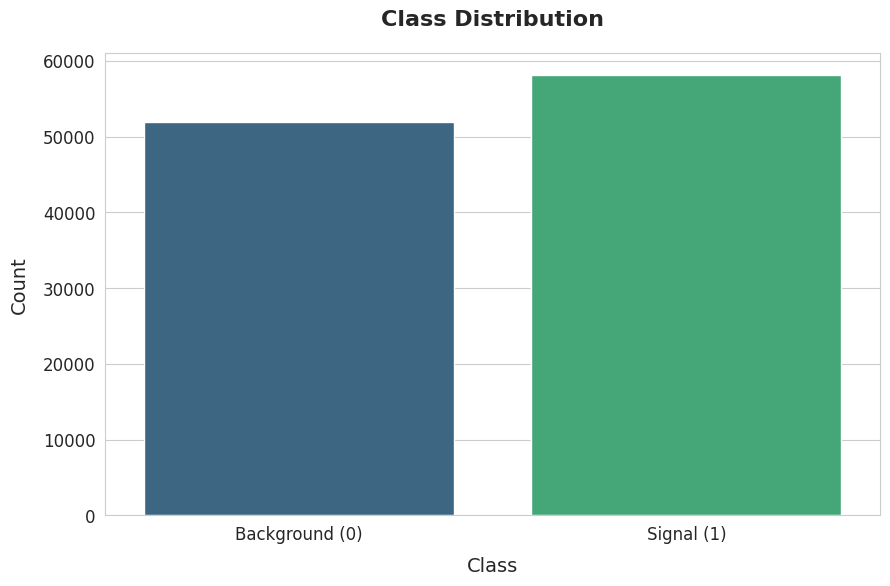

In [14]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.countplot(x=df['label'],hue=df['label'],legend=False, palette="viridis")


plt.title('Class Distribution', fontsize=16, weight='bold', pad=20)
plt.xlabel('Class', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)

plt.xticks(ticks=[0, 1], labels=['Background (0)', 'Signal (1)'], fontsize=12)
plt.yticks(fontsize=12)

<h3> Box Plots</h3>
<h5>Utilizing box plots to analyze both the kinematic properties and the derived features, we can effectively identify potential outliers that may impact the overall modeling process. Understanding the distribution and outlier presence within these features is crucial for refining the dataset and improving the accuracy of predictive models.</h5>

<Figure size 1500x1000 with 0 Axes>

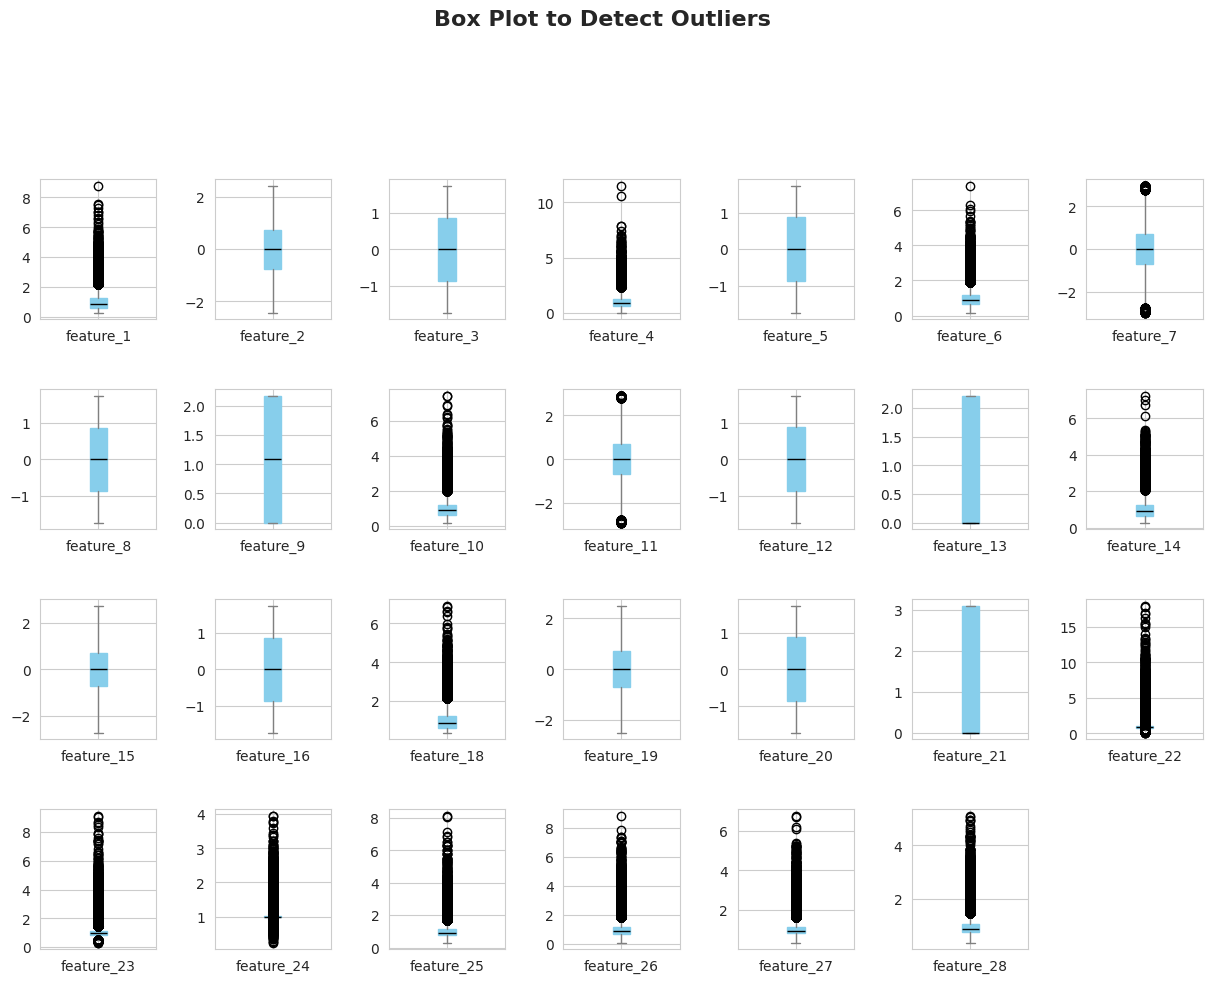

In [15]:

plt.figure(figsize=(15, 10))
X.plot(kind='box', subplots=True, layout=(4, 7),
       figsize=(15, 10), sharex=False, sharey=False,
       patch_artist=True, color=dict(boxes="SkyBlue", whiskers="Gray", medians="Black", caps="Gray"))


plt.suptitle("Box Plot to Detect Outliers", fontsize=16, weight='bold', y=1.05)


plt.subplots_adjust(hspace=0.5, wspace=0.5)


plt.show()

<h3> Feature Distributions</h3>

By observing the shape of the histogram, I identified whether the distribution is skewed (i.e., asymmetric) or has heavy tails (kurtosis). It helps to detect outliers by observing datas which fall far from majority of data

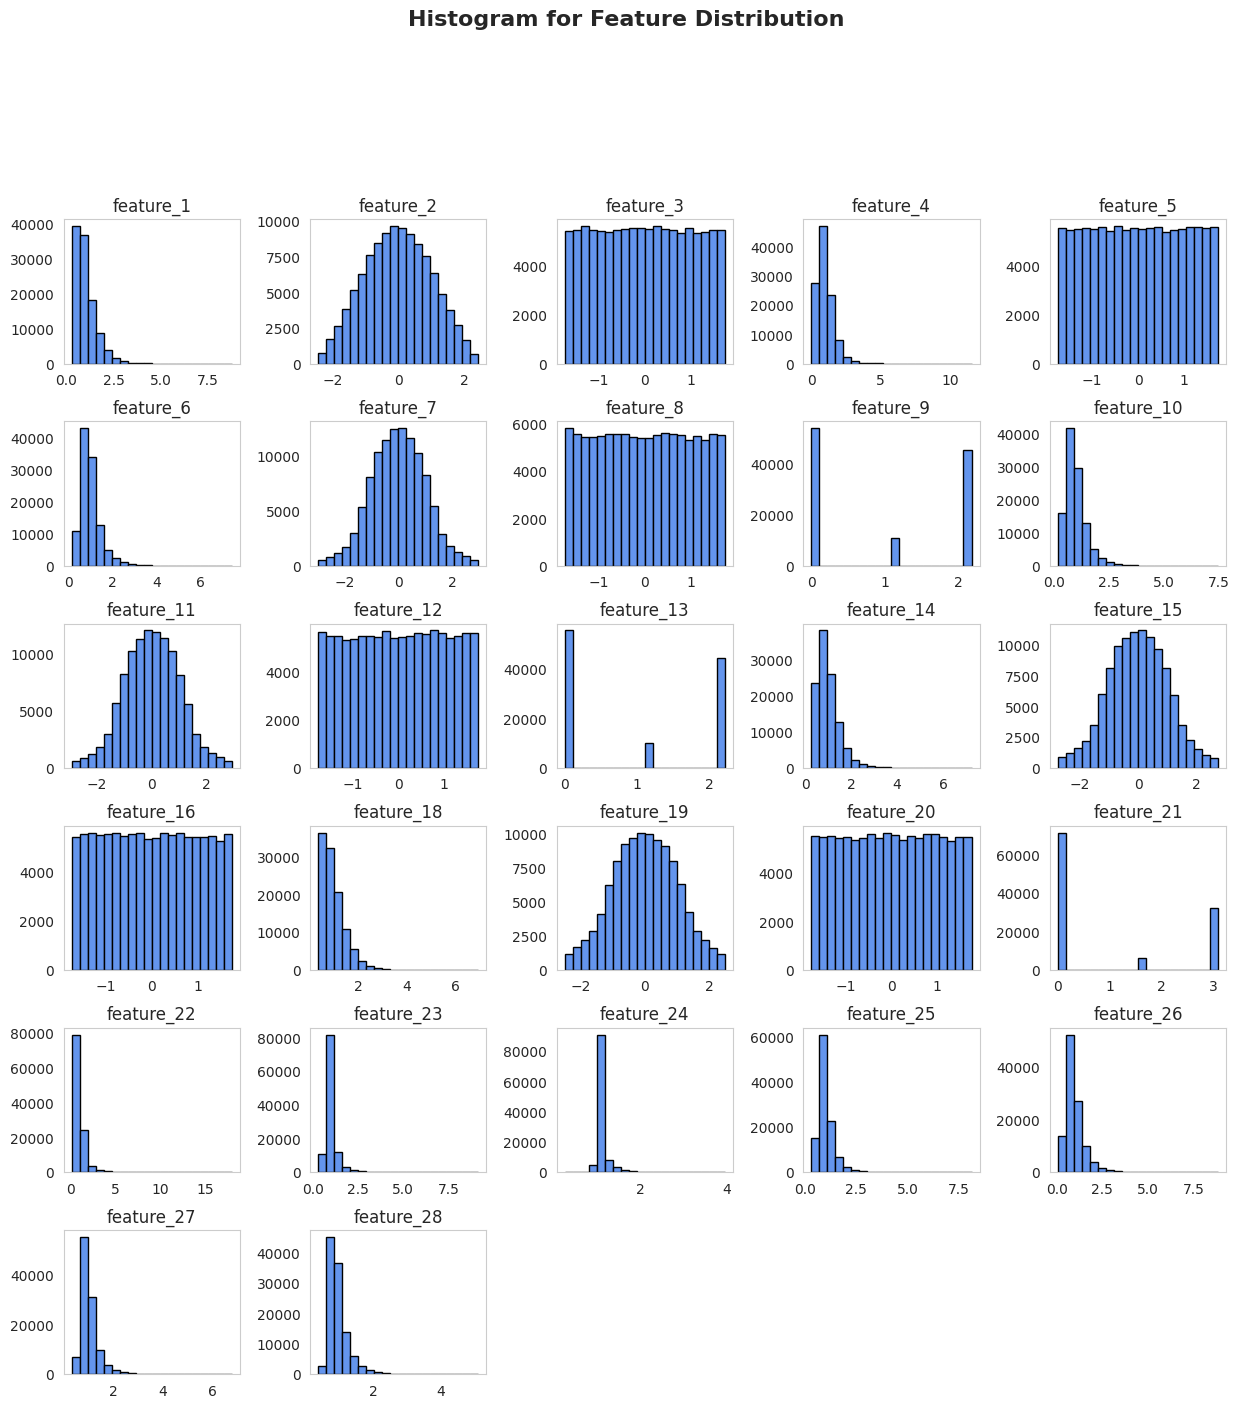

In [16]:

X.hist(bins=20, figsize=(15, 15), color="cornflowerblue", edgecolor="black", grid=False)

plt.suptitle("Histogram for Feature Distribution", fontsize=16, weight='bold', y=1.02)


plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()


<h3>Correlation Heatmap</h3>

This analysis employs a correlation heatmap to visualize the relationships between the features in the dataset. A heatmap is a graphical representation of data where individual values are represented as colors, making it easy to identify patterns and correlations.

<b>Purpose of the Heatmap</b>

- **Understanding Feature Relationships**: The heatmap displays the correlation coefficients between pairs of features, indicating how closely related they are. Correlation values range from -1 to 1, where:
  - **1** indicates a perfect positive correlation (as one feature increases, the other also increases).
  - **-1** indicates a perfect negative correlation (as one feature increases, the other decreases).
  - **0** indicates no correlation.

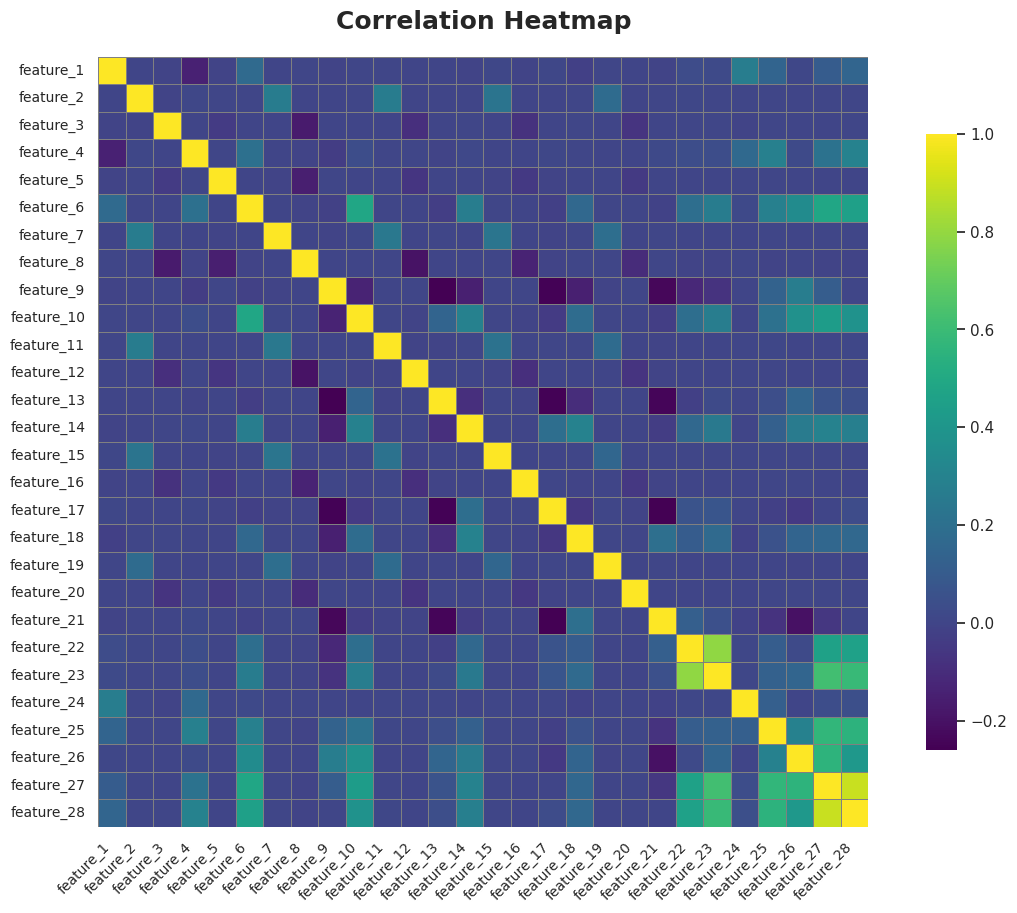

In [17]:

plt.figure(figsize=(15, 10))
sns.set(style="white")


sns.heatmap(X.corr(), annot=False, cmap='viridis',
            square=True, cbar_kws={'shrink': 0.8}, linewidths=0.5, linecolor='gray')


plt.title('Correlation Heatmap', fontsize=18, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)


plt.show()


## Data Normalization/Standardization

Normalization as well as Standardization is not only useful but a necessary pre-processing required for convergence during SVM.
<h3>Normalization</h3>

**Normalization** refers to the process of rescaling the features of a dataset to a common range, typically between 0 and 1. This technique is particularly useful when the features have different units or scales. The formula used for normalization is:

$$
X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

where:
-  $X$  is the original feature value,
-  $X_{min}$  is the minimum value of the feature,
-  $X_{max}$  is the maximum value of the feature.

In [18]:
scaler = MinMaxScaler()
labels = df.iloc[:,0]
scaled_features = scaler.fit_transform(X)
df_scaled = pd.DataFrame(scaled_features, columns=X.columns)
X=df_scaled
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28
0,0.030258,0.3842,0.297030,0.059091,0.701456,0.262637,0.293411,0.508770,0.0,0.202492,...,0.452984,0.109993,0.0,0.031862,0.234507,0.200892,0.071838,0.105890,0.253440,0.235314
1,0.007801,0.5142,0.593295,0.253604,0.643529,0.244055,0.367139,0.126548,1.0,0.118128,...,0.527009,0.870427,1.0,0.150406,0.174688,0.198171,0.379622,0.127822,0.257700,0.415903
2,0.175359,0.4536,0.116997,0.119743,0.562558,0.043104,0.407173,0.692305,0.0,0.074327,...,0.743581,0.921843,0.0,0.048950,0.051759,0.510772,0.112136,0.066592,0.075448,0.080005
3,0.051877,0.3356,0.142625,0.056059,0.779024,0.060979,0.620684,0.970392,0.0,0.134377,...,0.490330,0.757887,1.0,0.077473,0.069995,0.201534,0.063580,0.048373,0.060977,0.080129
4,0.006211,0.7866,0.824106,0.103237,0.704625,0.099958,0.649208,0.046958,1.0,0.034421,...,0.432311,0.361976,1.0,0.041964,0.110061,0.203977,0.067739,0.132386,0.084323,0.091651


<h3> Standardization </h3>

**Standardization**, on the other hand, transforms the features to have a mean of 0 and a standard deviation of 1. This technique is often used when the features follow a Gaussian distribution. The formula for standardization is:

$$
X_{standard} = \frac{X - \mu}{\sigma}
$$

where:
- $\mu$  is the mean of the feature,
- $\sigma$  is the standard deviation of the feature.

In [19]:
scaler = StandardScaler()
labels = df.iloc[:, 0]
X = df.iloc[:, 1:]
scaled_features = scaler.fit_transform(X)
df_scaled = pd.DataFrame(scaled_features, columns=X.columns)
X = df_scaled
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28
0,-0.809012,-0.553561,-0.701277,-0.522695,0.695200,2.254391,-1.216259,0.037022,-0.977069,1.349386,...,-0.231792,-1.352458,-0.710676,-0.535040,3.521596,-0.425904,-0.387468,0.038015,2.559224,1.665555
1,-1.144670,0.074503,0.326729,3.194545,0.494798,1.971195,-0.784059,-1.284371,1.137135,0.113686,...,0.134554,1.284866,1.505528,2.612294,2.138438,-0.488190,5.655937,0.402878,2.634101,4.381358
2,1.359759,-0.218271,-1.325971,0.636387,0.214676,-1.091467,-0.549381,0.671526,-0.977069,-0.527865,...,1.206364,1.463184,-0.710676,-0.081367,-0.704004,6.667658,0.403787,-0.615727,-0.569373,-0.670077
3,-0.485880,-0.788361,-1.237045,-0.580647,0.963550,-0.819038,0.702238,1.632913,-0.977069,0.351701,...,-0.046969,0.894556,1.505528,0.675920,-0.282344,-0.411204,-0.549612,-0.918804,-0.823747,-0.668204
4,-1.168439,1.390541,1.127620,0.320949,0.706163,-0.224963,0.869447,-1.559525,1.137135,-1.112383,...,-0.334105,-0.478534,1.505528,-0.266841,0.644078,-0.355275,-0.467950,0.478789,-0.413378,-0.494930


## Feature Engineering

<h3> Polynomial Features </h3>


The primary purpose of generating polynomial features is to create new features that capture interactions and non-linear relationships between the original features in the dataset. This is particularly useful in regression models where the relationship between the independent variables (features) and the dependent variable (target) is not strictly linear.

In [20]:
poly = PolynomialFeatures(degree=2, include_bias=False,interaction_only=False)
poly_features = poly.fit_transform(X)
poly_features_cols=poly.get_feature_names_out(X.columns)
d_poly=pd.DataFrame(poly_features,columns=poly_features_cols)
d_poly

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_25^2,feature_25 feature_26,feature_25 feature_27,feature_25 feature_28,feature_26^2,feature_26 feature_27,feature_26 feature_28,feature_27^2,feature_27 feature_28,feature_28^2
0,-0.809012,-0.553561,-0.701277,-0.522695,0.695200,2.254391,-1.216259,0.037022,-0.977069,1.349386,...,0.150131,-0.014730,-0.991616,-0.645349,0.001445,0.097289,0.063316,6.549627,4.262529,2.774075
1,-1.144670,0.074503,0.326729,3.194545,0.494798,1.971195,-0.784059,-1.284371,1.137135,0.113686,...,31.989620,2.278655,14.898311,24.780683,0.162311,1.061223,1.765155,6.938490,11.540941,19.196298
2,1.359759,-0.218271,-1.325971,0.636387,0.214676,-1.091467,-0.549381,0.671526,-0.977069,-0.527865,...,0.163044,-0.248623,-0.229905,-0.270568,0.379120,0.350578,0.412585,0.324185,0.381524,0.449004
3,-0.485880,-0.788361,-1.237045,-0.580647,0.963550,-0.819038,0.702238,1.632913,-0.977069,0.351701,...,0.302074,0.504986,0.452741,0.367253,0.844200,0.756862,0.613949,0.678559,0.550431,0.446497
4,-1.168439,1.390541,1.127620,0.320949,0.706163,-0.224963,0.869447,-1.559525,1.137135,-1.112383,...,0.218978,-0.224049,0.193440,0.231602,0.229239,-0.197921,-0.236967,0.170881,0.204593,0.244955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109981,0.493793,1.366385,-0.501880,-0.111478,-1.362148,-0.257454,0.423558,0.802499,-0.977069,-0.681218,...,0.025667,0.060667,-0.086026,-0.035727,0.143390,-0.203329,-0.084444,0.288324,0.119742,0.049730
109982,-0.150543,-0.111984,1.362916,-1.222913,0.046279,-0.521231,-1.679749,-1.412593,-0.977069,0.747125,...,0.706267,1.048851,-1.134771,-0.882468,1.557611,-1.685207,-1.310521,1.823255,1.417876,1.102629
109983,0.087469,0.796295,0.928226,-0.090245,-1.731292,0.489659,0.164433,0.959337,-0.977069,-0.309367,...,0.058019,0.039613,0.100960,0.127858,0.027047,0.068932,0.087297,0.175684,0.222489,0.281763
109984,0.914570,-0.984511,0.249954,-1.255047,0.808703,0.169358,-0.617828,-1.114876,-0.977069,1.075378,...,0.004871,0.028060,-0.069633,-0.048677,0.161645,-0.401135,-0.280414,0.995446,0.695869,0.486449


In [21]:
print("Original Shape:",X.shape)
print("Shape after polynomial transformation:",d_poly.shape)

Original Shape: (109986, 28)
Shape after polynomial transformation: (109986, 434)


In [22]:
X=d_poly

## Feature Selection

`SelectKBest` is used to select the top 50 features after obtaining polynomial features

In [23]:
## Selecting top 50 columns after polynomial featuers are added using SelectKBest
choose_k=SelectKBest(f_classif,k=50)
X_new=choose_k.fit_transform(X,y)
selected_indices=choose_k.get_support(indices=True)
selected_feature_names=X.columns[selected_indices]
print(selected_feature_names)


Index(['feature_1', 'feature_4', 'feature_6', 'feature_13', 'feature_26',
       'feature_27', 'feature_28', 'feature_1^2', 'feature_1 feature_6',
       'feature_1 feature_9', 'feature_1 feature_10', 'feature_1 feature_14',
       'feature_1 feature_18', 'feature_1 feature_27', 'feature_1 feature_28',
       'feature_2 feature_15', 'feature_2 feature_19', 'feature_4^2',
       'feature_4 feature_6', 'feature_4 feature_27', 'feature_4 feature_28',
       'feature_6 feature_9', 'feature_6 feature_25', 'feature_6 feature_26',
       'feature_6 feature_27', 'feature_6 feature_28', 'feature_9 feature_10',
       'feature_9 feature_13', 'feature_9 feature_14', 'feature_9 feature_18',
       'feature_9 feature_21', 'feature_9 feature_26', 'feature_9 feature_27',
       'feature_10 feature_26', 'feature_10 feature_27',
       'feature_10 feature_28', 'feature_13 feature_17',
       'feature_13 feature_26', 'feature_14 feature_26',
       'feature_21 feature_26', 'feature_21 feature_27', 'feat

In [24]:
X=X[selected_feature_names]
X

,feature_1,feature_4,feature_6,feature_13,feature_26,feature_27,feature_28,feature_1^2,feature_1 feature_6,feature_1 feature_9,...,feature_21 feature_27,feature_25^2,feature_25 feature_27,feature_25 feature_28,feature_26^2,feature_26 feature_27,feature_26 feature_28,feature_27^2,feature_27 feature_28,feature_28^2
0,-0.809012,-0.522695,2.254391,1.163694,0.038015,2.559224,1.665555,0.654500,-1.823829,0.790461,...,-1.818779,0.150131,-0.991616,-0.645349,0.001445,0.097289,0.063316,6.549627,4.262529,2.774075
1,-1.144670,3.194545,1.971195,-0.948544,0.402878,2.634101,4.381358,1.310270,-2.256368,-1.301644,...,3.965714,31.989620,14.898311,24.780683,0.162311,1.061223,1.765155,6.938490,11.540941,19.196298
2,1.359759,0.636387,-1.091467,1.163694,-0.615727,-0.569373,-0.670077,1.848945,-1.484133,-1.328579,...,0.404639,0.163044,-0.229905,-0.270568,0.379120,0.350578,0.412585,0.324185,0.381524,0.449004
3,-0.485880,-0.580647,-0.819038,-0.948544,-0.918804,-0.823747,-0.668204,0.236080,0.397954,0.474739,...,-1.240174,0.302074,0.452741,0.367253,0.844200,0.756862,0.613949,0.678559,0.550431,0.446497
4,-1.168439,0.320949,-0.224963,-0.948544,0.478789,-0.413378,-0.494930,1.365250,0.262855,-1.328673,...,-0.622352,0.218978,0.193440,0.231602,0.229239,-0.197921,-0.236967,0.170881,0.204593,0.244955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109981,0.493793,-0.111478,-0.257454,1.163694,0.378669,-0.536958,-0.223001,0.243831,-0.127129,-0.482470,...,0.381603,0.025667,-0.086026,-0.035727,0.143390,-0.203329,-0.084444,0.288324,0.119742,0.049730
109982,-0.150543,-1.222913,-0.521231,-0.948544,-1.248043,1.350280,1.050061,0.022663,0.078468,0.147091,...,2.032884,0.706267,-1.134771,-0.882468,1.557611,-1.685207,-1.310521,1.823255,1.417876,1.102629
109983,0.087469,-0.090245,0.489659,1.163694,-0.164459,-0.419146,-0.530814,0.007651,0.042830,-0.085464,...,-0.631036,0.058019,0.100960,0.127858,0.027047,0.068932,0.087297,0.175684,0.222489,0.281763
109984,0.914570,-1.255047,0.169358,-0.948544,-0.402052,0.997721,0.697459,0.836439,0.154890,-0.893598,...,1.502096,0.004871,-0.069633,-0.048677,0.161645,-0.401135,-0.280414,0.995446,0.695869,0.486449


# Linear SVM



A **Linear Support Vector Machine (SVM)** is a supervised machine learning algorithm used primarily for binary classification tasks. It is especially effective for linearly separable data, as it finds an optimal hyperplane that maximizes the margin between classes, enhancing the model’s ability to generalize to new data.

<h3> Key Concepts</h3>

1. **Hyperplane**: In an $n$-dimensional space, a hyperplane is an $(n-1)$-dimensional boundary that separates data points into different classes. Linear SVM seeks the optimal hyperplane that best divides the classes.

2. **Margin**: The margin is the distance between the hyperplane and the nearest data points from each class, known as support vectors. SVM aims to maximize this margin to improve model robustness.

3. **Objective Function**: The goal of Linear SVM is to minimize a cost function that balances margin maximization and classification accuracy. For linearly separable data, the optimization problem is defined as:
   
   $$ \text{minimize } \frac{1}{2} ||w||^2 \quad \text{subject to } y_i(w \cdot x_i + b) \geq 1 \text{ for all } i $$

   where:
   - $w$ is the weight vector,
   - $b$ is the bias term,
   - $y_i$ and $x_i$ are the labels and feature vectors of the data points.

4. **Support Vectors**: These are the data points closest to the hyperplane. They define the position of the hyperplane and help prevent overfitting, as only these critical points influence the margin.

<h3> Time Complexity </h3>

The time complexity of training a Linear SVM depends on the optimization method and dataset size:

- **Quadratic Programming (QP) Solvers**: Traditional SVM training with QP solvers has a complexity of approximately $O(m^2 \times n)$ to $O(m^3)$, where:
  - $m$ is the number of samples,
  - $n$ is the number of features.
  
- **Stochastic Gradient Descent (SGD)**: For large datasets, SGD can be used to train Linear SVMs more efficiently with a complexity of $O(m \times n)$, making it suitable for high-dimensional data.

- **Linear SVM Solvers (e.g., Liblinear)**: Specialized solvers, like Liblinear, are optimized for linear SVMs and typically perform well on large, sparse datasets, providing efficient computation.

In summary, for large datasets, using SGD or specialized solvers significantly reduces training time, making Linear SVM feasible for high-dimensional and large-scale data.



In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [26]:
X_train.shape

(87988, 50)

In [27]:

C_values = [0.01, 0.1, 1, 10, 100]
best_model_metrics = None
best_C = None
best_area_roc = 0

# Iterate over the defined C values
for C in C_values:

    linear_svm = LinearSVC(penalty='l2', C=C, random_state=42, dual=False)
    linear_svm.fit(X_train, y_train)

    # Make predictions and calculate decision scores
    predicted_values = linear_svm.predict(X_test)
    decision_scores = linear_svm.decision_function(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, predicted_values)
    precision = precision_score(y_test, predicted_values)
    recall = recall_score(y_test, predicted_values)
    f1 = f1_score(y_test, predicted_values)
    area_roc = roc_auc_score(y_test, decision_scores)


    print(f"C = {C}:")
    print("=" * 30)
    print(f"Accuracy     : {accuracy:.2f}")
    print(f"Precision    : {precision:.2f}")
    print(f"Recall       : {recall:.2f}")
    print(f"F1 Score     : {f1:.2f}")
    print(f"ROC AUC Score: {area_roc:.2f}\n")

    # Check if the current model is the best so far
    if area_roc > best_area_roc:
        best_area_roc = area_roc
        best_C = C
        best_model_metrics = {
            'C': C,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC Score': area_roc
        }

# Print the best model metrics
print("Best Model Performance Metrics:")
print("=" * 30)
for metric, value in best_model_metrics.items():
    print(f"{metric} : {value:.2f}")

print("\nClassification Report for Best Model:\n", classification_report(y_test, linear_svm.predict(X_test)))


C = 0.01:
Accuracy     : 0.65
Precision    : 0.64
Recall       : 0.76
F1 Score     : 0.70
ROC AUC Score: 0.70

C = 0.1:
Accuracy     : 0.65
Precision    : 0.64
Recall       : 0.76
F1 Score     : 0.70
ROC AUC Score: 0.70

C = 1:
Accuracy     : 0.65
Precision    : 0.64
Recall       : 0.76
F1 Score     : 0.70
ROC AUC Score: 0.70

C = 10:
Accuracy     : 0.65
Precision    : 0.64
Recall       : 0.76
F1 Score     : 0.70
ROC AUC Score: 0.70

C = 100:
Accuracy     : 0.65
Precision    : 0.64
Recall       : 0.76
F1 Score     : 0.70
ROC AUC Score: 0.70

Best Model Performance Metrics:
C : 0.01
Accuracy : 0.65
Precision : 0.64
Recall : 0.76
F1 Score : 0.70
ROC AUC Score : 0.70

Classification Report for Best Model:
               precision    recall  f1-score   support

         0.0       0.66      0.52      0.58     10378
         1.0       0.64      0.76      0.70     11620

    accuracy                           0.65     21998
   macro avg       0.65      0.64      0.64     21998
weighted avg   

In [28]:
sgd_svm = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, max_iter=1000, tol=1e-3,
                        random_state=42, n_jobs=-1)

# Fit the model
sgd_svm.fit(X_train, y_train)

# Predict and evaluate
predicted_values = sgd_svm.predict(X_test)
decision_scores = sgd_svm.decision_function(X_test)  # Get decision scores for ROC AUC

# Calculate metrics
accuracy = accuracy_score(y_test, predicted_values)
precision = precision_score(y_test, predicted_values)
recall = recall_score(y_test, predicted_values)
f1 = f1_score(y_test, predicted_values)
area_roc = roc_auc_score(y_test, decision_scores)  # Calculate ROC AUC

# Print results
print("Performance Metrics for SGD-based SVM:")
print("="*30)
print(f"Accuracy     : {accuracy:.2f}")
print(f"Precision    : {precision:.2f}")
print(f"Recall       : {recall:.2f}")
print(f"F1 Score     : {f1:.2f}")
print(f"ROC AUC Score : {area_roc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, predicted_values))

Performance Metrics for SGD-based SVM:
Accuracy     : 0.65
Precision    : 0.63
Recall       : 0.81
F1 Score     : 0.71
ROC AUC Score : 0.70

Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.47      0.55     10378
         1.0       0.63      0.81      0.71     11620

    accuracy                           0.65     21998
   macro avg       0.65      0.64      0.63     21998
weighted avg       0.65      0.65      0.63     21998



# SVM with Kernels

## Polynomial Kernel



An **SVM with a Polynomial Kernel** is a variant of Support Vector Machine that uses a polynomial function to map data to a higher-dimensional space, making it possible to classify data that is not linearly separable in the original feature space. This approach is particularly useful for datasets where complex boundaries between classes are required.

<h3> Key Concepts</h3>

1. **Kernel Trick**: The polynomial kernel allows SVM to compute inner products in a higher-dimensional space without explicitly transforming the data. This is achieved through the kernel function:
   
   $$ K(x_i, x_j) = (x_i \cdot x_j + c)^d $$
   
   where:
   - $x_i$ and $x_j$ are feature vectors,
   - $c$ is a free parameter that controls the influence of higher-degree terms,
   - $d$ is the degree of the polynomial, which determines the complexity of the decision boundary.

2. **Hyperparameters**:
   - **Degree ($d$)**: Determines the flexibility of the decision boundary. Higher values of $d$ create more complex boundaries but may risk overfitting.
   - **Coefficient ($c$)**: Adjusts the balance between higher- and lower-degree terms, impacting the influence of feature interactions in the model.

3. **Objective Function**: Similar to the linear SVM, the polynomial kernel SVM maximizes the margin while minimizing a cost function, but it operates in the transformed feature space created by the kernel. This results in a more complex decision boundary, capable of separating data that isn’t linearly separable.

<h3> Time Complexity </h3>

The time complexity of training an SVM with a polynomial kernel is typically higher than that of a linear SVM due to the increased complexity of the kernel function and the computation of inner products in a higher-dimensional space:

- **Quadratic Programming (QP) Solvers**: For traditional QP solvers, the time complexity is approximately $O(m^2 \times (d_{\text{poly}}+n))$ to $O(m^3)$, where:
  - $m$ is the number of samples,
  - $n$ is the number of features
  - $d_{\text{poly}}$ is the degree of the polynomial, which influences the computational complexity based on the expanded feature space.

- **Scaling with Higher Degrees**: As the degree of the polynomial kernel increases, the complexity of each computation grows, making high-degree polynomial kernels computationally intensive, especially for large datasets.

- **Approximate Solvers**: To improve efficiency, approximate solvers or methods like **Stochastic Gradient Descent (SGD)** may be applied, but these approaches can still be computationally demanding when using polynomial kernels with high degrees.

In summary, SVMs with polynomial kernels are effective for capturing complex patterns in data, but they are computationally intensive, especially for large datasets and higher polynomial degrees. This makes polynomial kernel SVMs suitable for smaller, complex datasets or cases where nonlinear boundaries are necessary.


In [30]:
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=10000, random_state=42)
degrees=[2,3,4]
poly_results={}
best_accuracy=0
best_degree=0
best_c=0
for degree in degrees:
  print(f"###Polynomial Kernel of degree {degree}###")
  C=[0.01,0.1,1,10,100]
  poly_results[degree] = {}
  for c in C:
    print(f"  -->C={c}")
    svm_poly=SVC(kernel='poly',C=c,degree=degree,probability=True)
    svm_poly.fit(X_train_sample,y_train_sample)
    predicted_values_train=svm_poly.predict(X_train)
    predicted_values=svm_poly.predict(X_test)
    predicted_probs=svm_poly.predict_proba(X_test)[:,1]

    accuracy=accuracy_score(y_test,predicted_values)
    precision=precision_score(y_test,predicted_values)
    recall=recall_score(y_test,predicted_values)
    f1=f1_score(y_test,predicted_values)
    area_roc=roc_auc_score(y_test,predicted_probs)
    print(f"     *Accuracy on training data: {accuracy_score(y_train,predicted_values_train):.4f}")
    print(f"     *Accuracy on test data: {accuracy:.4f}")

    poly_results[degree][c]={
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1':f1,
        'area_roc':area_roc
    }
    if accuracy > best_accuracy:
          best_accuracy = accuracy
          best_degree=degree
          best_c=c

print("\nBest Model: ")
print(f"Degree: {best_degree}, C: {best_c}")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"Precision: {poly_results[best_degree][best_c]['precision']:.4f}")
print(f"Recall: {poly_results[best_degree][best_c]['recall']:.4f}")
print(f"F1 Score: {poly_results[best_degree][best_c]['f1']:.4f}")
print(f"Area Under the ROC Curve: {poly_results[best_degree][best_c]['area_roc']:.4f}")




###Polynomial Kernel of degree 2###
  -->C=0.01
     *Accuracy on training data: 0.5476
     *Accuracy on test data: 0.5452
  -->C=0.1
     *Accuracy on training data: 0.5633
     *Accuracy on test data: 0.5606
  -->C=1
     *Accuracy on training data: 0.5945
     *Accuracy on test data: 0.5905
  -->C=10
     *Accuracy on training data: 0.6443
     *Accuracy on test data: 0.6335
  -->C=100
     *Accuracy on training data: 0.6707
     *Accuracy on test data: 0.6552
###Polynomial Kernel of degree 3###
  -->C=0.01
     *Accuracy on training data: 0.5472
     *Accuracy on test data: 0.5445
  -->C=0.1
     *Accuracy on training data: 0.5561
     *Accuracy on test data: 0.5525
  -->C=1
     *Accuracy on training data: 0.5697
     *Accuracy on test data: 0.5657
  -->C=10
     *Accuracy on training data: 0.5977
     *Accuracy on test data: 0.5895
  -->C=100
     *Accuracy on training data: 0.6377
     *Accuracy on test data: 0.6201
###Polynomial Kernel of degree 4###
  -->C=0.01
     *Accuracy

## RBF Kernel



An **SVM with a Radial Basis Function (RBF) Kernel** is a type of Support Vector Machine that uses a Gaussian (RBF) kernel to map data into a higher-dimensional space. This kernel is particularly powerful for non-linearly separable data, as it can create complex decision boundaries by considering the distance between data points.

<h3> Key Concepts </h3>

1. **RBF Kernel (Gaussian)**: The RBF kernel function computes the similarity between two points based on their distance. The kernel function is defined as:
   
   $$ K(x_i, x_j) = \exp \left( -\gamma ||x_i - x_j||^2 \right) $$
   
   where:
   - $x_i$ and $x_j$ are feature vectors,
   - $\gamma$ is a hyperparameter that controls the influence of each training example; a higher $\gamma$ means each point has a narrower influence, leading to a more flexible decision boundary.

2. **Hyperparameters**:
   - **Gamma ($\gamma$)**: Determines how far the influence of a single training example reaches. High values of $\gamma$ create tighter, more localized boundaries, while lower values create smoother, broader decision boundaries.
   - **Regularization Parameter ($C$)**: Balances the trade-off between achieving a smooth decision boundary and correctly classifying training points.

3. **Objective Function**: Similar to other SVMs, the RBF kernel SVM maximizes the margin and minimizes classification error by finding an optimal separating hyperplane in the transformed feature space.

<h3> Time Complexity </h3>

The time complexity of training an SVM with an RBF kernel is generally higher than that of a linear SVM, as it involves computing the pairwise distances between all data points in the transformed space:

- **Quadratic Programming (QP) Solvers**: Using traditional QP solvers, the time complexity is approximately $O(m^2 \times n)$ to $O(m^3)$, where:
  - $m$ is the number of samples,
  - $n$ is the number of features.

- **Pairwise Computation**: For large datasets, computing pairwise similarities between data points becomes computationally intensive due to the $O(m^2)$ pairwise comparisons, which grows quadratically with the number of samples.

- **Approximate Solvers and Optimization**: Some approximate solvers, such as **Stochastic Gradient Descent (SGD)** or **SMO (Sequential Minimal Optimization)**, can help reduce computation time. However, the RBF kernel remains computationally intensive for large datasets due to the required kernel matrix computations.

In summary, SVMs with an RBF kernel are effective for handling complex, non-linearly separable data and work well with small to medium-sized datasets. For very large datasets, the computational costs can be high, which may necessitate the use of approximate solvers or dimensionality reduction techniques.


In [31]:
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=10000, random_state=42)
gammas=[0.001,0.01,0.1]
rbf_results={}
best_accuracy=0
best_gamma=0
best_c=0
for gamma in gammas:
  print(f"###RBF Kernel of gamma={gamma}###")
  C=[0.01,0.1,1,10,100]
  rbf_results[gamma] = {}
  for c in C:
    print(f"  -->C={c}")
    svm_rbf=SVC(kernel='rbf',C=c,gamma=gamma,probability=True)
    svm_rbf.fit(X_train_sample,y_train_sample)
    predicted_values_train=svm_rbf.predict(X_train)
    predicted_values=svm_rbf.predict(X_test)
    predicted_probs=svm_rbf.predict_proba(X_test)[:,1]

    accuracy=accuracy_score(y_test,predicted_values)
    precision=precision_score(y_test,predicted_values)
    recall=recall_score(y_test,predicted_values)
    f1=f1_score(y_test,predicted_values)
    area_roc=roc_auc_score(y_test,predicted_probs)
    print(f"     *Accuracy on training data: {accuracy_score(y_train,predicted_values_train):.4f}")
    print(f"     *Accuracy on test data: {accuracy:.4f}")

    rbf_results[gamma][c]={
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1':f1,
        'area_roc':area_roc
    }
    if accuracy > best_accuracy:
          best_accuracy = accuracy
          best_gamma=gamma
          best_c=c

print("\nBest Model: ")
print(f"Gamma {best_gamma}, C: {best_c}")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"Precision: {rbf_results[best_gamma][best_c]['precision']:.4f}")
print(f"Recall: {rbf_results[best_gamma][best_c]['recall']:.4f}")
print(f"F1 Score: {rbf_results[best_gamma][best_c]['f1']:.4f}")
print(f"Area Under the ROC Curve: {rbf_results[best_gamma][best_c]['area_roc']:.4f}")


###RBF Kernel of gamma=0.001###
  -->C=0.01
     *Accuracy on training data: 0.5463
     *Accuracy on test data: 0.5437
  -->C=0.1
     *Accuracy on training data: 0.5811
     *Accuracy on test data: 0.5788
  -->C=1
     *Accuracy on training data: 0.6306
     *Accuracy on test data: 0.6241
  -->C=10
     *Accuracy on training data: 0.6737
     *Accuracy on test data: 0.6643
  -->C=100
     *Accuracy on training data: 0.6820
     *Accuracy on test data: 0.6690
###RBF Kernel of gamma=0.01###
  -->C=0.01
     *Accuracy on training data: 0.5811
     *Accuracy on test data: 0.5765
  -->C=0.1
     *Accuracy on training data: 0.6333
     *Accuracy on test data: 0.6239
  -->C=1
     *Accuracy on training data: 0.6847
     *Accuracy on test data: 0.6712
  -->C=10
     *Accuracy on training data: 0.6932
     *Accuracy on test data: 0.6730
  -->C=100
     *Accuracy on training data: 0.6893
     *Accuracy on test data: 0.6618
###RBF Kernel of gamma=0.1###
  -->C=0.01
     *Accuracy on training da

## Custom Kernel(RBF+Linear)

A **Custom Kernel SVM** combines an RBF kernel with a linear kernel to create a hybrid decision boundary that leverages both local (RBF) and global (linear) patterns. This can enhance model flexibility, capturing complex structures while maintaining a smooth decision boundary.

### Custom Kernel Definition

The custom kernel function is defined as:
   
$$ K(X, Y) = \text{rbf_kernel}(X, Y, \gamma=0.5) + \text{linear_kernel}(X, Y) $$

Here, `rbf_kernel` captures non-linear interactions, while `linear_kernel` preserves global linear trends.<br>
Time complexity would be similar to that of RBF Kernel
### Advantages

- **Combines Strengths**: This approach benefits from the RBF kernel’s flexibility and the linear kernel’s generalization capabilities.
- **Balanced Complexity**: Offers a more adaptable boundary than a pure linear kernel and a simpler model than a standalone RBF kernel.


In [32]:
def custom_kernel(X, Y):
    return rbf_kernel(X, Y, gamma=0.5) + linear_kernel(X, Y)

# Randomly sample 10,000 items from X_train and y_train
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=1000, random_state=42)


C=[0.01,0.1,1,10,100]
best_accuracy=0
best_c=0
custom_results={}

for c in C:
  print(f"###Custom Kernel of C={c}###")
  svm_custom=SVC(kernel=custom_kernel,C=c,probability=True)
  svm_custom.fit(X_train_sample,y_train_sample)
  predicted_values_train=svm_custom.predict(X_train)
  predicted_values=svm_custom.predict(X_test)
  predicted_probs=svm_custom.predict_proba(X_test)[:,1]

  accuracy=accuracy_score(y_test,predicted_values)
  precision=precision_score(y_test,predicted_values)
  recall=recall_score(y_test,predicted_values)
  f1=f1_score(y_test,predicted_values)
  area_roc=roc_auc_score(y_test,predicted_probs)
  print(f"     *Accuracy on training data: {accuracy_score(y_train,predicted_values_train):.4f}")
  print(f"     *Accuracy on test data: {accuracy:.4f}")

  custom_results[c]={
      'accuracy':accuracy,
      'precision':precision,
      'recall':recall,
      'f1':f1,
      'area_roc':area_roc
  }
  if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_c=c


print("\nBest Model: ")
print(f"C: {best_c}")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"Precision: {custom_results[best_c]['precision']:.4f}")
print(f"Recall: {custom_results[best_c]['recall']:.4f}")
print(f"F1 Score: {custom_results[best_c]['f1']:.4f}")
print(f"Area Under the ROC Curve: {custom_results[best_c]['area_roc']:.4f}")


###Custom Kernel of C=0.01###
     *Accuracy on training data: 0.6262
     *Accuracy on test data: 0.6220
###Custom Kernel of C=0.1###
     *Accuracy on training data: 0.6513
     *Accuracy on test data: 0.6450
###Custom Kernel of C=1###
     *Accuracy on training data: 0.6531
     *Accuracy on test data: 0.6430
###Custom Kernel of C=10###
     *Accuracy on training data: 0.6440
     *Accuracy on test data: 0.6325
###Custom Kernel of C=100###
     *Accuracy on training data: 0.6440
     *Accuracy on test data: 0.6325

Best Model: 
C: 0.1
Accuracy: 0.6450
Precision: 0.6444
Recall: 0.7316
F1 Score: 0.6852
Area Under the ROC Curve: 0.6833


# Hyperparameter Tuning(Random Search)

<h3> Random Search for Hyperparameter Tuning</h3>

**Random Search** is a technique used for hyperparameter tuning where random combinations of hyperparameters are sampled from predefined distributions. Unlike grid search, which exhaustively evaluates all combinations in a grid, random search only evaluates a fixed number of randomly chosen settings.

<h4> Key Concepts</h4>

- **Sampling**: Hyperparameters are sampled from specified distributions (e.g., uniform, normal, or discrete choices).
- **Efficiency**: By exploring random combinations, random search often finds good hyperparameter settings faster than grid search, especially in high-dimensional spaces.
- **Flexibility**: Allows for different types of distributions per hyperparameter, providing more control over the search space.

<h4> Advantages </h4>

- **Computational Efficiency**: Evaluates fewer combinations than grid search, saving time and computational resources.
- **Performance**: Can achieve similar or better performance with fewer trials, especially when only a subset of hyperparameters has a significant impact on the model.

Random search is well-suited for problems with a large hyperparameter space and is commonly used in machine learning for model optimization.


## Polynomial Kernel

In [33]:
param_distributions_poly = {
    'C': [0.01, 0.1, 1, 10],
    'degree': [2, 3, 4]
}

svm_poly = SVC(kernel='poly',max_iter=1000)
random_search_poly = RandomizedSearchCV(
    svm_poly,
    param_distributions=param_distributions_poly,
    n_iter=10,
    cv=5,
    scoring='f1',
    random_state=42
)

random_search_poly.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(kernel='poly', max_iter=1000),
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'degree': [2, 3, 4]},
                   random_state=42, scoring='f1')

## RBF Kernel

In [34]:
param_distributions_rbf = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1]
}

svm_rbf = SVC(kernel='rbf',max_iter=1000)
random_search_rbf = RandomizedSearchCV(
    svm_rbf,
    param_distributions=param_distributions_rbf,
    n_iter=10,
    cv=5,
    scoring='f1',
    random_state=42
)
random_search_rbf.fit(X_train, y_train)



RandomizedSearchCV(cv=5, estimator=SVC(max_iter=1000),
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'gamma': [0.001, 0.01, 0.1, 1]},
                   random_state=42, scoring='f1')

## Custom Kernel(Linear+RBF)

In [35]:
def custom_kernel(X, Y):
    return rbf_kernel(X, Y, gamma=0.5) + linear_kernel(X, Y)

param_distributions_custom = {
    'C': [0.01, 0.1, 1, 10],
}

X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

svm_custom = SVC(kernel=custom_kernel,max_iter=1000)
random_search_custom = RandomizedSearchCV(
    svm_custom,
    param_distributions=param_distributions_custom,
    n_iter=10,
    cv=5,
    scoring='f1',
    random_state=42
)

random_search_custom.fit(X_train_sample, y_train_sample)

RandomizedSearchCV(cv=5,
                   estimator=SVC(kernel=<function custom_kernel at 0x703ef2e82520>,
                                 max_iter=1000),
                   param_distributions={'C': [0.01, 0.1, 1, 10]},
                   random_state=42, scoring='f1')

## Evaluation of Kernels

In [36]:
def evaluate_model(model,X_test,y_test):
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  report=classification_report(y_test,y_pred,output_dict=True)
  f1=report['weighted avg']['f1-score']
  precision=report['weighted avg']['precision']
  recall=report['weighted avg']['recall']
  auc=roc_auc_score(y_test, model.decision_function(X_test))
  return accuracy,f1,precision,recall,auc



In [37]:
best_poly_model = random_search_poly.best_estimator_
poly_accuracy, poly_f1,poly_precision,poly_recall, poly_auc = evaluate_model(best_poly_model, X_test, y_test)

In [38]:
best_rbf_model = random_search_rbf.best_estimator_
rbf_accuracy, rbf_f1,rbf_precision,rbf_recall,rbf_auc = evaluate_model(best_rbf_model, X_test, y_test)

In [39]:
best_custom_model = random_search_custom.best_estimator_
custom_accuracy, custom_f1,custom_precision,custom_recall,custom_auc = evaluate_model(best_custom_model, X_test, y_test)

In [40]:
best_poly_params = random_search_poly.best_params_
print("Best Parameters for Polynomial Kernel SVM:", best_poly_params)

print("Accuracy:", poly_accuracy)
print("F1 Score:", poly_f1)
print("Precision:", poly_precision)
print("Recall:", poly_recall)
print("Area Under the ROC Curve:", poly_auc)

Best Parameters for Polynomial Kernel SVM: {'degree': 3, 'C': 10}
Accuracy: 0.5298663514864987
F1 Score: 0.3696975316977986
Precision: 0.6617960631250124
Recall: 0.5298663514864987
Area Under the ROC Curve: 0.5445785537325913


In [41]:
best_rbf_params = random_search_rbf.best_params_
print("Best Parameters for RBF Kernel SVM:", best_rbf_params)

print("Accuracy:", rbf_accuracy)
print("F1 Score:", rbf_f1)
print("Precision:", rbf_precision)
print("Recall:", rbf_recall)
print("Area Under the ROC Curve:", rbf_auc)

Best Parameters for RBF Kernel SVM: {'gamma': 0.001, 'C': 0.01}
Accuracy: 0.541640149104464
F1 Score: 0.42130994842876524
Precision: 0.5835457674162655
Recall: 0.541640149104464
Area Under the ROC Curve: 0.6434653903447947


In [42]:
best_custom_params = random_search_custom.best_params_
print("Best Parameters for Custom Kernel SVM:", best_custom_params)

print("Accuracy:", custom_accuracy)
print("F1 Score:", custom_f1)
print("Precision:", custom_precision)
print("Recall:", custom_recall)
print("Area Under the ROC Curve:", custom_auc)

Best Parameters for Custom Kernel SVM: {'C': 0.1}
Accuracy: 0.5364124011273752
F1 Score: 0.39950654990915874
Precision: 0.5853994398996166
Recall: 0.5364124011273752
Area Under the ROC Curve: 0.5691469426421376


The decrase in accuracy is due to the restricted number of iterations of the Random Search.With bigger data it exceed RAM storage.But it's accuracy is believed to increase with increase in iterations

# Hyperparameter Sensitivity Analysis

## Polynomial Kernel

In [43]:
C_values = [0.01, 0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1]
degrees = [2, 3, 4]
heatmap_data_accuracy_poly = np.zeros((len(degrees), len(C_values)))

for i, degree in enumerate(degrees):
    for j, C in enumerate(C_values):
        heatmap_data_accuracy_poly[i, j] = poly_results[degree][C]['accuracy']

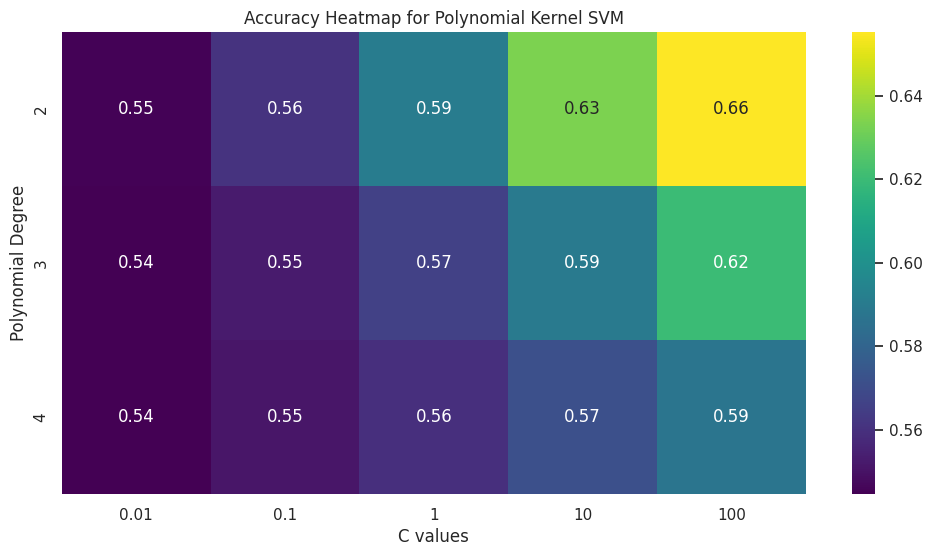

In [44]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_accuracy_poly, annot=True, fmt=".2f", cmap='viridis', xticklabels=C_values, yticklabels=degrees)
plt.title('Accuracy Heatmap for Polynomial Kernel SVM')
plt.xlabel('C values')
plt.ylabel('Polynomial Degree')
plt.show()

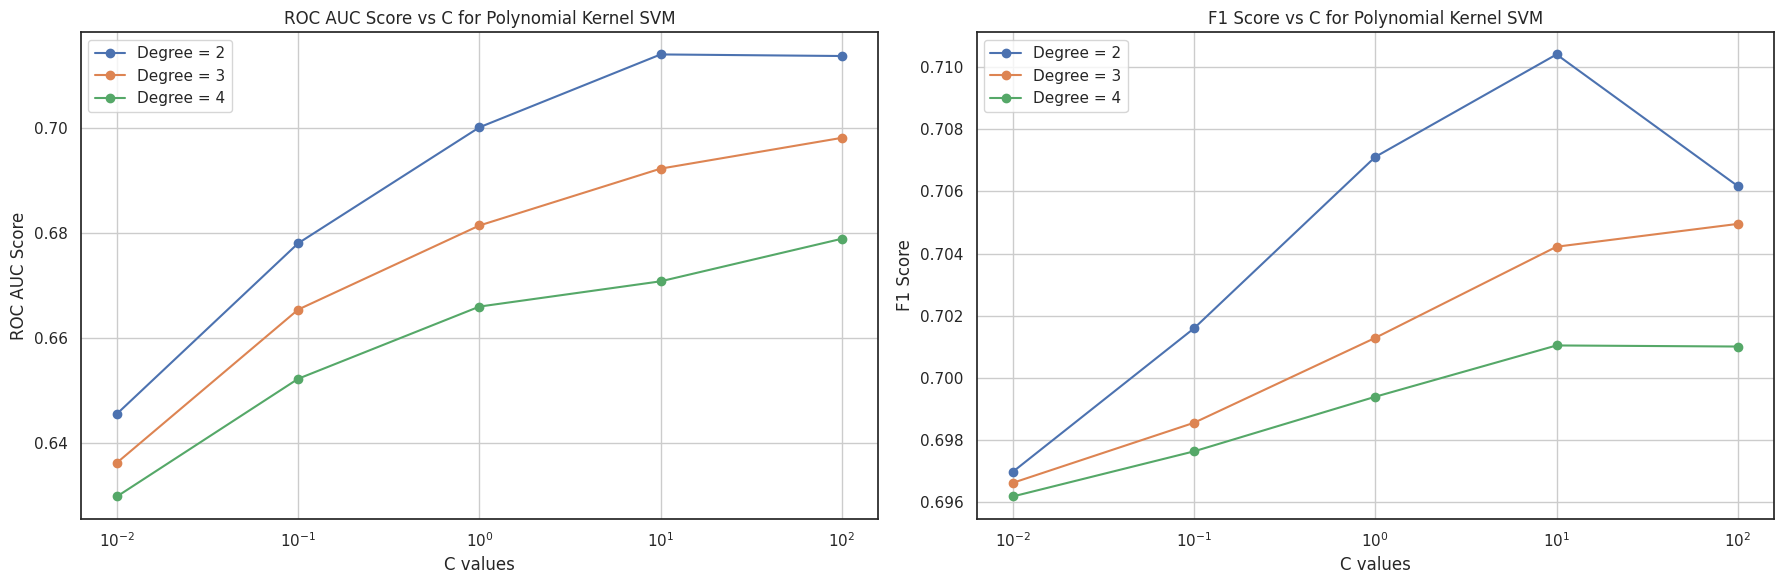

In [45]:
# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot ROC AUC scores on the first subplot
for degree in degrees:
    if degree in poly_results:
        roc_auc_scores = [poly_results[degree][C]['area_roc'] for C in C_values if C in poly_results[degree]]
        ax1.plot(C_values, roc_auc_scores, marker='o', label=f'Degree = {degree}')

# Set title and labels for the first subplot
ax1.set_title('ROC AUC Score vs C for Polynomial Kernel SVM')
ax1.set_xlabel('C values')
ax1.set_ylabel('ROC AUC Score')
ax1.set_xscale('log')
ax1.grid()
ax1.legend()

# Plot F1 scores on the second subplot
for degree in degrees:
    if degree in poly_results:
        f1_scores = [poly_results[degree][C]['f1'] for C in C_values if C in poly_results[degree]]
        ax2.plot(C_values, f1_scores, marker='o', label=f'Degree = {degree}')

# Set title and labels for the second subplot
ax2.set_title('F1 Score vs C for Polynomial Kernel SVM')
ax2.set_xlabel('C values')
ax2.set_ylabel('F1 Score')
ax2.set_xscale('log')
ax2.grid()
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


## RBF Kernel

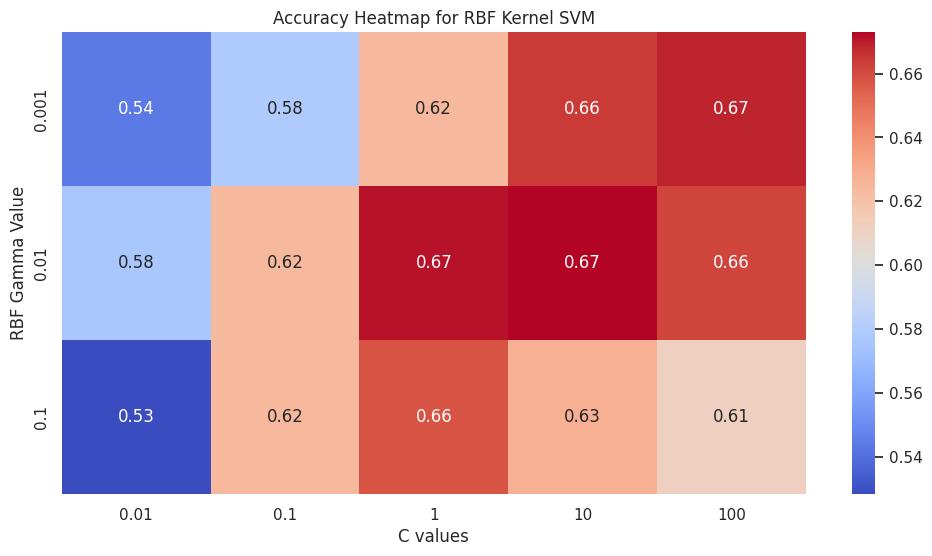

In [46]:
heatmap_data_accuracy_rbf = np.zeros((len(gamma_values), len(C_values)))

for i, gamma in enumerate(gamma_values):
    for j, C in enumerate(C_values):
        heatmap_data_accuracy_rbf[i, j] = rbf_results[gamma][C]['accuracy']
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_accuracy_rbf, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=C_values, yticklabels=gamma_values)
plt.title('Accuracy Heatmap for RBF Kernel SVM')
plt.xlabel('C values')
plt.ylabel('RBF Gamma Value')
plt.show()

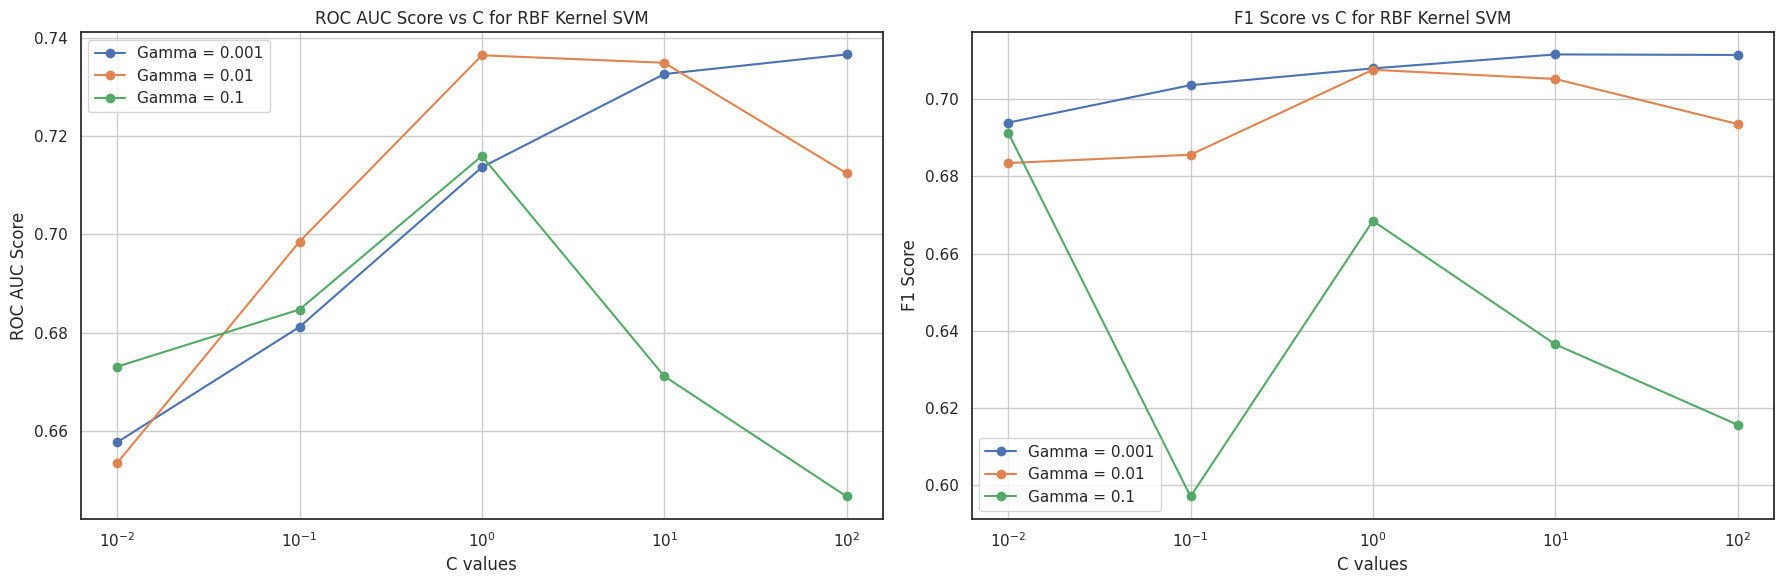

In [47]:
# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
# Plot ROC AUC scores for RBF Kernel on the third subplot
for gamma in gammas:  # Assuming you have a list of gamma values for RBF kernel
    if gamma in rbf_results:
        roc_auc_scores_rbf = [rbf_results[gamma][C]['area_roc'] for C in C_values if C in rbf_results[gamma]]
        ax1.plot(C_values, roc_auc_scores_rbf, marker='o', label=f'Gamma = {gamma}')

# Set title and labels for the third subplot
ax1.set_title('ROC AUC Score vs C for RBF Kernel SVM')
ax1.set_xlabel('C values')
ax1.set_ylabel('ROC AUC Score')
ax1.set_xscale('log')
ax1.grid()
ax1.legend()

# Plot F1 scores for RBF Kernel on the fourth subplot
for gamma in gammas:  # Assuming you have a list of gamma values for RBF kernel
    if gamma in rbf_results:
        f1_scores_rbf = [rbf_results[gamma][C]['f1'] for C in C_values if C in rbf_results[gamma]]
        ax2.plot(C_values, f1_scores_rbf, marker='o', label=f'Gamma = {gamma}')

# Set title and labels for the fourth subplot
ax2.set_title('F1 Score vs C for RBF Kernel SVM')
ax2.set_xlabel('C values')
ax2.set_ylabel('F1 Score')
ax2.set_xscale('log')
ax2.grid()
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Custom Kernel(RBF+Linear)

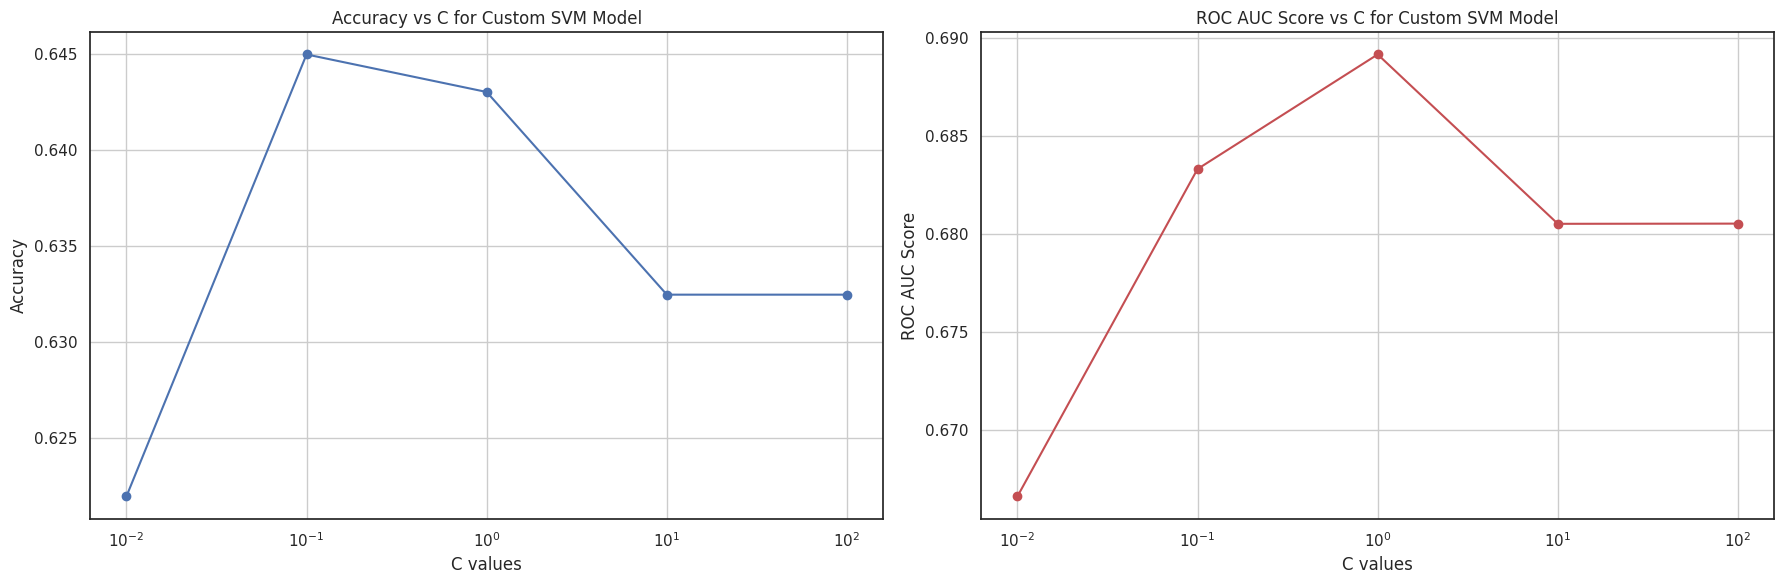

In [48]:
# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Extract accuracy values from custom_results for the first subplot
accuracy_values = []
C_labels = []

for c in C_values:
    if c in custom_results:
        accuracy_values.append(custom_results[c]['accuracy'])
        C_labels.append(c)

# Create the line plot for Accuracy on the first subplot
ax1.plot(C_labels, accuracy_values, marker='o', linestyle='-', color='b')
ax1.set_title('Accuracy vs C for Custom SVM Model')
ax1.set_xlabel('C values')
ax1.set_ylabel('Accuracy')
ax1.set_xscale('log')
ax1.grid()

# Plot ROC AUC scores for custom_results on the second subplot
roc_auc_values = []
C_labels_roc_auc = []

for c in C_values:
    if c in custom_results:
        roc_auc_values.append(custom_results[c]['area_roc'])  # Assuming 'area_roc' is available in custom_results
        C_labels_roc_auc.append(c)

# Create the line plot for ROC AUC on the second subplot
ax2.plot(C_labels_roc_auc, roc_auc_values, marker='o', linestyle='-', color='r')
ax2.set_title('ROC AUC Score vs C for Custom SVM Model')
ax2.set_xlabel('C values')
ax2.set_ylabel('ROC AUC Score')
ax2.set_xscale('log')
ax2.grid()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()





# Analysis

In [49]:

best_models = []

best_models.append({
    'Kernel': 'Linear',
    'Accuracy': best_model_metrics['Accuracy'],
    'F1 Score': best_model_metrics['F1 Score'],
    'Precision': best_model_metrics['Precision'],
    'Recall': best_model_metrics['Recall'],
    'Area Under the ROC Curve': best_model_metrics['ROC AUC Score']
})

best_models.append({
    'Kernel': 'Polynomial',
    'Accuracy': poly_results[2][100]['accuracy'],
    'F1 Score': poly_results[2][100]['f1'],
    'Precision': poly_results[2][100]['precision'],
    'Recall': poly_results[2][100]['recall'],
    'Area Under the ROC Curve': poly_results[2][100]['area_roc']
})

best_models.append({
    'Kernel': 'RBF',
    'Accuracy': rbf_results[0.01][10]['accuracy'],
    'F1 Score': rbf_results[0.01][10]['f1'],
    'Precision': rbf_results[0.01][10]['precision'],
    'Recall': rbf_results[0.01][10]['recall'],
    'Area Under the ROC Curve': rbf_results[0.01][10]['area_roc']
})

best_models.append({
    'Kernel': 'Custom',
    'Accuracy': custom_results[0.1]['accuracy'],
    'F1 Score': custom_results[0.1]['f1'],
    'Precision': custom_results[0.1]['precision'],
    'Recall': custom_results[0.1]['recall'],
    'Area Under the ROC Curve': custom_results[0.1]['area_roc']
})
best_models_df = pd.DataFrame(best_models)
best_models_df


,Kernel,Accuracy,F1 Score,Precision,Recall,Area Under the ROC Curve
0,Linear,0.649014,0.696083,0.641422,0.760929,0.700115
1,Polynomial,0.655150,0.706174,0.642062,0.784509,0.713691
2,RBF,0.672970,0.705236,0.673080,0.740620,0.734914
3,Custom,0.644968,0.685233,0.644406,0.731583,0.683306


**SHAP** is a popular framework for interpreting machine learning models by calculating the contribution of each feature to a prediction. SHAP values are based on Shapley values from cooperative game theory, where each feature is viewed as a "player" that contributes to the model's output. This makes SHAP a powerful tool for explaining complex models.

<h3> Key Concepts</h3>

1. **Feature Contribution**: SHAP values quantify the effect of each feature on a model's prediction. Positive SHAP values indicate that a feature increases the prediction, while negative values suggest a decrease.

2. **Additivity**: SHAP values satisfy the additivity property, meaning the sum of SHAP values for all features approximately equals the model output, ensuring a clear explanation of how each feature influences the prediction.

3. **Model-Agnostic**: SHAP can be used with any machine learning model. The `KernelExplainer` in SHAP, for example, is model-agnostic and can explain the predictions of any classifier, including linear models like `LinearSVC`.



100%|█████████████████████████████████████████████████████████████████████| 2000/2000 [09:54<00:00,  3.36it/s]


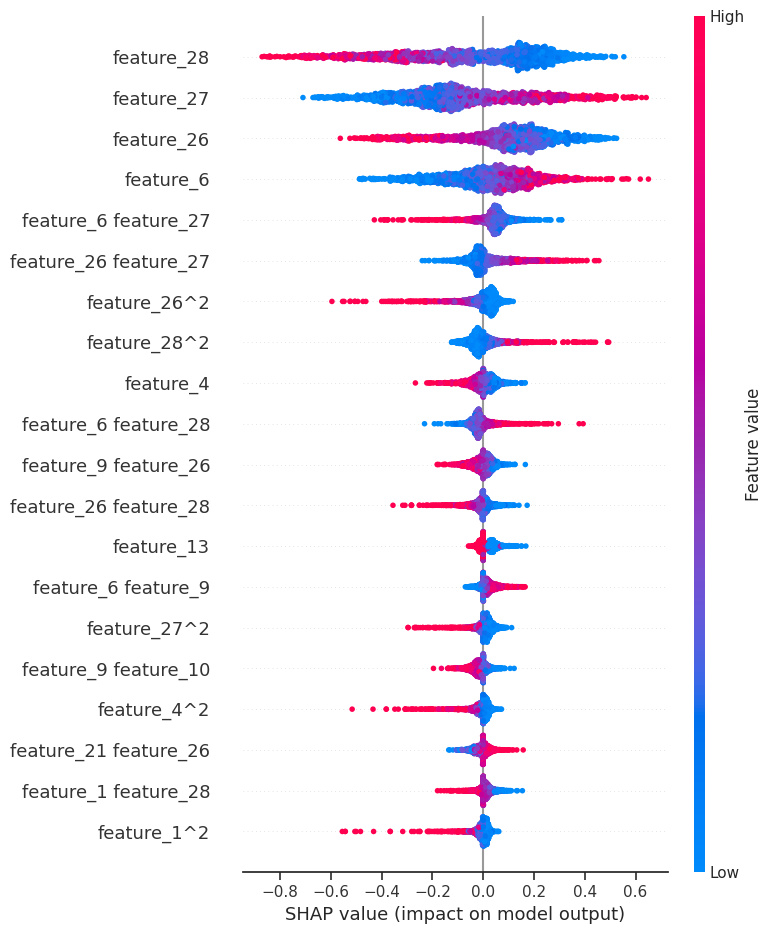

In [50]:
linear_svm = LinearSVC(penalty='l2', C=1, random_state=42, dual=False)
linear_svm.fit(X_train, y_train)

explainer = shap.KernelExplainer(linear_svm.predict, X_train.iloc[:5])

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test.iloc[:2000])
shap.summary_plot(shap_values, X_test.iloc[:2000])